# TP2 Multivariate extreme value theory

### Building a simple model from scratch

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Utils: those are functions that you can use for next questions

def pareto_tail_sample(n, s=1.0):
    """
    Sample R with tail P(R > r) = s / r for r >= s (i.e., Pareto with xm = s, alpha = 1).
    Inverse-CDF: F(r) = 1 - s/r  =>  r = s / (1 - U),  U ~ Uniform(0,1).
    Equivalently, R = s / U' with U' ~ Uniform(0,1], but we use the stable form below.
    """
    U = np.random.random(size=n)
    # guard against U==1 exactly (numerical)
    U = np.clip(U, 1e-12, 1 - 1e-12)
    R = s / (1 - U)
    return R

def sample_delta(n):
    """
    Sample δ ∈ {-1, +1} with P=1/2 each.
    """
    alea = np.random.random(size=n)
    delta = (alea > 1/2)*1 + (alea <= 1/2)*(-1)
    return delta

def sample_R_Theta(n, s=1.0):
    """
    Draw n i.i.d. samples of (R, Θ).
    Parameters
    ----------
    n : int
    s : float
        Tail scale so that P(R>r) = s/r for r >= s. Default s=1 (clean, matches hints).
        If you insist on the statement P(R>r) = 1/(2r) for r>=2, set s=0.5 (since s/r = 1/(2r)).
        (Note: the analysis/plots are qualitatively identical for any s>0.)
    seed : int
    """
    R = pareto_tail_sample(n, s=s)
    delta = sample_delta(n)

    # Build Θ = (1/2 + δ/(2R), 1/2 - δ/(2R))
    theta1 = 0.5 + delta / (2.0 * R)
    theta2 = 0.5 - delta / (2.0 * R)
    Theta = np.column_stack([theta1, theta2])
    return R, Theta

def quantile_thresholds_from_tail(q_list, s=1.0):
    """
    For P(R>r) = s/r (r >= s), CDF F(r) = 1 - s/r, so the q-quantile is:
        u_q = s / (1 - q)
    """
    q_list = np.asarray(q_list)
    return s / (1.0 - q_list)


In [21]:
# Part 1: no code

[Part 2] Drew n=10000 samples.
  q=  0.0: u_q=    0.5000, exceedances=  10000
  q=  0.5: u_q=    1.0000, exceedances=   5002
  q=  0.9: u_q=    5.0000, exceedances=    988
  q= 0.99: u_q=   50.0000, exceedances=    100


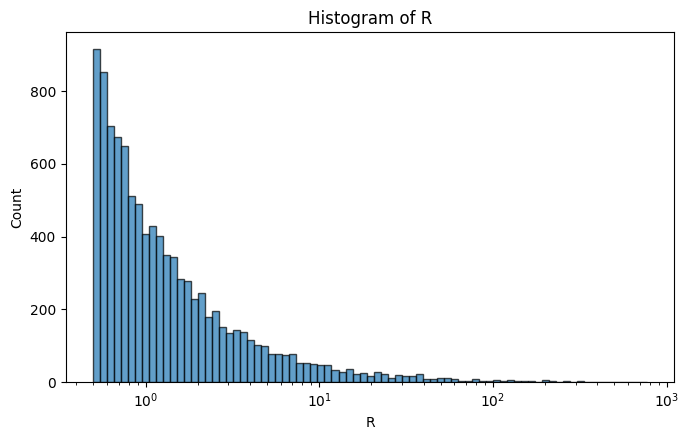

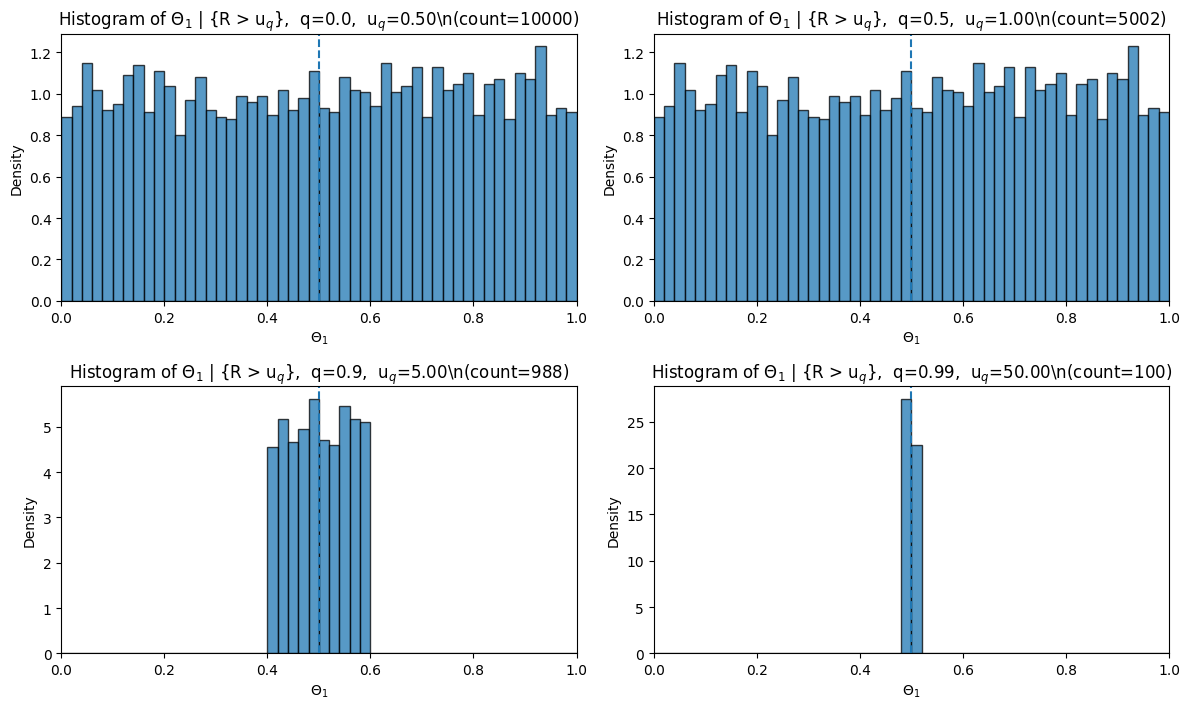

In [6]:
# Part 2: Sampling & exploration

def part2_plots(n=200_000, s=1.0, q_list=(0.0, 0.5, 0.9, 0.99)):
    """
    (a) Simulate i.i.d. samples of (R, Θ).
    (b) Plot a histogram of R (on log scale for readability).
    (c) For thresholds u_q with F_R(u_q) = q, plot histograms of Θ1 | {R > u_q}.
    """
    R, Theta = sample_R_Theta(n=n, s=s)
    theta1 = Theta[:, 0]

    # (b) Histogram of R (heavy tail: use log scale on x for visibility)
    plt.figure(figsize=(7, 4.5))
    bins = np.logspace(np.log10(np.percentile(R, 0.1)), np.log10(np.percentile(R, 99.9)), 80)
    plt.hist(R, bins=bins, edgecolor='black', alpha=0.7)
    plt.xscale('log')
    plt.xlabel("R")
    plt.ylabel("Count")
    plt.title("Histogram of R")
    plt.tight_layout()

    # (c) Θ1 | {R > u_q} histograms
    uqs = quantile_thresholds_from_tail(q_list, s=s)
    ncols = min(2, len(q_list))
    nrows = int(np.ceil(len(q_list) / ncols))
    plt.figure(figsize=(6*ncols, 3.6*nrows))
    for i, (q, uq) in enumerate(zip(q_list, uqs), start=1):
        mask = R > uq
        plt.subplot(nrows, ncols, i)
        plt.hist(theta1[mask], bins=50, range=(0.0, 1.0), edgecolor='black', alpha=0.75, density=True)
        plt.xlim(0, 1)
        plt.xlabel(r"$\Theta_1$")
        plt.ylabel("Density")
        plt.title(rf"Histogram of $\Theta_1$ | {{R > u$_q$}},  q={q},  u$_q$={uq:.2f}\n(count={mask.sum()})")
        # Visual cue for 1/2
        plt.axvline(0.5, linestyle='--')
    plt.tight_layout()

    print(f"[Part 2] Drew n={n} samples.")
    for q, uq in zip(q_list, uqs):
        print(f"  q={q:>5}: u_q={uq:>10.4f}, exceedances={(R>uq).sum():>7}")


# # Parameters you can tweak:
s = 1/2      # tail scale for P(R>r) = s/r (default matches R = 1/U)
n_small = 10_000
n_med = 200_000
n_large = 300_000
q_list=(0.0, 0.5, 0.9, 0.99)

part2_plots(n=n_small, s=s, q_list=q_list)

In [ ]:
# Part 3: χ² test for asymptotic independence

def chi2_independence_test_over_thresholds(
    R, Theta, threshold, s=1.0, B=8, K=5
):
    #TODO : Fill in the code
    pass


